# Analysis of the bimodal clustering of the nuclei

As show previously the population of U2OS cells is very heterogeneous with respect to their nuclear morphology and chromatin organization even within the same experimental condition i.e. when the same gene is overexpressed by an ORF construct. This is due to the inherent heterogeneity which is also present in the population of untreated cells. Since it has been shown that the cellular morphology and the organization of the chromatin organization is important for a single-cells response to environmental stimulus, the heterogeneity in the response patterns is expected. To disentangle the effect of the overexpression of individual genes it might be beneficial to limit the heterogeneity in the studied population to a specific morphological nuclear phenotype. One possible approach is to restrict the study to the set of nuclei that are elongated in the control and different treatment conditions. Since the effect of the treatment however might also alter the nuclear shape we will keep track of the ratio of elongated to non-elongated cells from each image when segmenting the individual nuclei. Similarly, we track the cell density in each image to maintain some information concerning cellular proximity and the viability of the cells in the different treatment conditions.

In this notebook, we quickly show the results of the applied two-component Gaussian Mixture Model clustering with distinct variance and parameters that is used to model the empirical distribution of the minor-to-major axis length ratio of the nuclei.

---
## 0. Environmental setup

In [28]:
import pandas as pd
import numpy as np
import tifffile
import matplotlib.pyplot as plt
import os
from collections import Counter
import seaborn as sns

---
## 1. Read in data

We will read in the metadata file that combines all the different information regarding the individual nuclei including their cluster assignments.

In [3]:
nuclei_metadata = pd.read_csv("../../data/experiments/image_preprocessing/full_pipeline/padded_nuclei_metadata.csv", index_col=0)

/home/paysan_d/miniconda3/envs/image2reg/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
nuclei_metadata.head()

,plate,well,image_file,gene_id,gene_symbol,is_landmark,allele,expr_vec,toxicity,ie_blast,...,virus_vol,timepoint,assay_well_role,bb_width,bb_height,minor_axis_length,major_axis_length,aspect_ratio,aspect_ratio_cluster,nuclei_count_image
0,41744,k21,taoe005-u2os-72h-cp-a-au00044859_k21_s7_w10efe...,1977.0,EIF4E,0.0,WT.2,pLX304,NaN,0.91,...,1,72H,Treated,33,21,15.474579,35.755476,0.432789,1,53
1,41744,k21,taoe005-u2os-72h-cp-a-au00044859_k21_s7_w10efe...,1977.0,EIF4E,0.0,WT.2,pLX304,NaN,0.91,...,1,72H,Treated,46,17,16.074259,48.342010,0.332511,1,53
2,41744,k21,taoe005-u2os-72h-cp-a-au00044859_k21_s7_w10efe...,1977.0,EIF4E,0.0,WT.2,pLX304,NaN,0.91,...,1,72H,Treated,31,29,24.256958,35.030138,0.692460,0,53
3,41744,k21,taoe005-u2os-72h-cp-a-au00044859_k21_s7_w10efe...,1977.0,EIF4E,0.0,WT.2,pLX304,NaN,0.91,...,1,72H,Treated,46,36,27.689881,51.502812,0.537638,1,53
4,41744,k21,taoe005-u2os-72h-cp-a-au00044859_k21_s7_w10efe...,1977.0,EIF4E,0.0,WT.2,pLX304,NaN,0.91,...,1,72H,Treated,32,27,26.587002,32.592086,0.815750,0,53


We see that roughly 60.27% of the nuclei were assigned to cluster 1 and the remaining to cluster 0.

In [27]:
c = Counter(np.array(nuclei_metadata["aspect_ratio_cluster"]))
[(i, c[i] / len(nuclei_metadata) * 100.0) for i in c]

[(1, 60.27296804090854), (0, 39.727031959091455)]

## 2. Visualization of the cluster solution

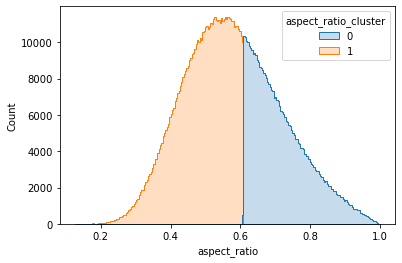

In [38]:
sns.histplot(nuclei_metadata, x="aspect_ratio", hue="aspect_ratio_cluster", element="step")
plt.show()

In [40]:
nuclei_metadata.loc[nuclei_metadata["aspect_ratio_cluster"]==1,"aspect_ratio"].max()

0.608464831422851

We see that the distribution of the aspect ratio is actually unimodal however the best 2-component Gaussian mixture model cluster solution determines a cut off at 0.6085, i.e. the major axis legnth being roughly 1.65 times larger than the minor axis length. It is also obvious that cluster 0 describes the less and cluster 1 the more elongated nuclei.

This can be verified by the plots below showing 100 nuclei sampled at random from the two clusters.

#### Cluster 0: Less elongated nuclei

In [13]:
image_input_dir = "../../data/experiments/image_preprocessing/full_pipeline/padded_nuclei"

In [17]:
cluster1_nuclei_md = nuclei_metadata.loc[nuclei_metadata["aspect_ratio_cluster"]==1,]
cluster0_nuclei_md = nuclei_metadata.loc[nuclei_metadata["aspect_ratio_cluster"]==0,]

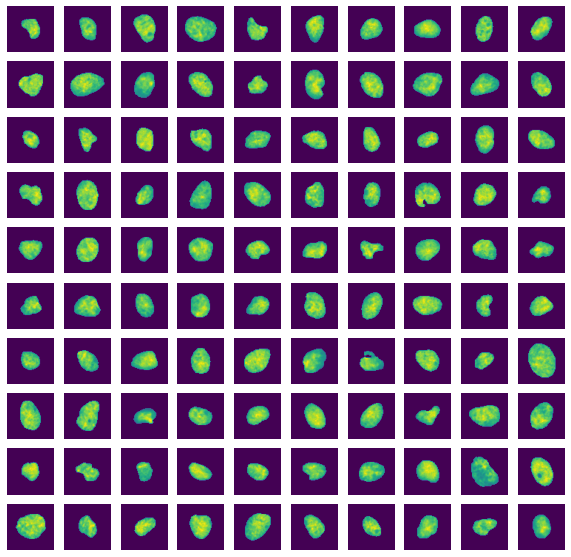

In [48]:
np.random.seed(1234)
idc = np.random.choice(len(cluster0_nuclei_md), 100)

fig, ax = plt.subplots(10,10, figsize=[10,10])
ax = ax.flatten()
for i in range(100):
    dat = cluster0_nuclei_md.iloc[idc[i],:]
    plate = dat["plate"]
    image_file = dat["image_file"]
    img_fname = os.path.join(image_input_dir, str(plate), image_file)
    ax[i].imshow(tifffile.imread(img_fname))
    ax[i].axis("off")

#### Cluster 1: More elongated nuclei

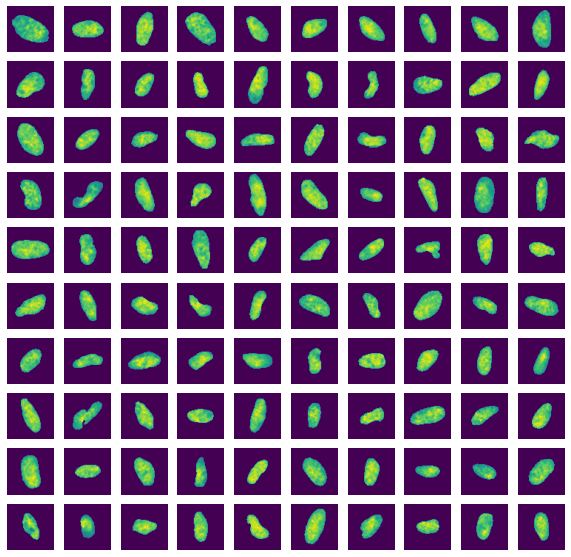

In [46]:
np.random.seed(1234)
idc = np.random.choice(len(cluster1_nuclei_md),100)

fig, ax = plt.subplots(10,10, figsize=[10,10])
ax = ax.flatten()
for i in range(100):
    dat = cluster1_nuclei_md.iloc[idc[i],:]
    plate = dat["plate"]
    image_file = dat["image_file"]
    img_fname = os.path.join(image_input_dir, str(plate), image_file)
    ax[i].imshow(tifffile.imread(img_fname))
    ax[i].axis("off")